In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
def display_image(position):
    image = x_train[position]
    plt.title('Example %d. Label: %d' % (position, y_train[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

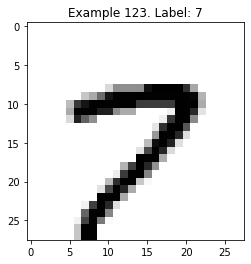

In [10]:
display_image(123) 

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
  
# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale
 
# To understand the structer of dataset
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


* The sequential model lets us build models layer by layer as needed in a multilayer perceptron, but it only works for stacks of layers with one input and one output.

* ‘Flatten’ flattens the input without changing the size of the batch. For example, if the shape of the inputs is (batch size) but there is no feature axis, flattening adds a new channel dimension, and the shape of the output will be (batch size, 1).

* The sigmoid activation function is used in the activation step. The first two dense layers are hidden and are used to make a fully connected model.

* The output layer - the last dense layer - has 10 neurons that decide which category the image belongs to.

In [12]:
model = Sequential([
    
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
    
      # dense layer 1
    Dense(256, activation='sigmoid'),  
    
    # dense layer 2
    Dense(128, activation='sigmoid'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


The compile function is employed here. It involves the use of loss, optimizers, and metrics. Sparse_categorical_crossentropy is used as the loss function and adam is used as the optimizer.

In [13]:
model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=40, batch_size=2000, validation_split=0.2)

Epoch 1/40
24/24 [==============================] - 0s 19ms/step - loss: 0.2691 - accuracy: 0.9248 - val_loss: 0.2521 - val_accuracy: 0.9307
Epoch 2/40
24/24 [==============================] - 0s 12ms/step - loss: 0.2550 - accuracy: 0.9280 - val_loss: 0.2416 - val_accuracy: 0.9320
Epoch 3/40
24/24 [==============================] - 0s 9ms/step - loss: 0.2436 - accuracy: 0.9312 - val_loss: 0.2329 - val_accuracy: 0.9356
Epoch 4/40
24/24 [==============================] - 0s 10ms/step - loss: 0.2326 - accuracy: 0.9337 - val_loss: 0.2236 - val_accuracy: 0.9366
Epoch 5/40
24/24 [==============================] - 0s 9ms/step - loss: 0.2223 - accuracy: 0.9365 - val_loss: 0.2159 - val_accuracy: 0.9393
Epoch 6/40
24/24 [==============================] - 0s 9ms/step - loss: 0.2130 - accuracy: 0.9392 - val_loss: 0.2079 - val_accuracy: 0.9416
Epoch 7/40
24/24 [==============================] - 0s 8ms/step - loss: 0.2039 - accuracy: 0.9417 - val_loss: 0.2002 - val_accuracy: 0.9449
Epoch 8/40
24/24 

In [16]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.09159352630376816, 0.9724000096321106]


In [17]:
y_predict = model.predict(x_test)
y_predict[3]

313/313 [==============================] - 1s 2ms/step


array([0.9997112 , 0.07003768, 0.5385719 , 0.07157171, 0.14575438,
       0.46722987, 0.68172395, 0.60369533, 0.08590481, 0.46475425],
      dtype=float32)

In [18]:
y_predict_classes = np.argmax(y_predict, axis=1)
y_predict_classes[3]

0

In [19]:
def display_predictions(position):
    image = x_test[position]
    plt.title('test set %d. predict Label: %d' % (position, y_predict_classes[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

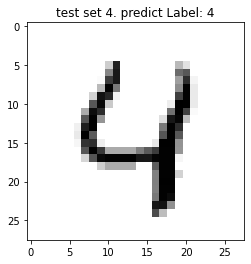

In [20]:
display_predictions(4)